## Taps generated from GNURadio

There are four basic types of filters: low-pass, high-pass, band-pass, and band-stop. Each type modifies signals to focus on different ranges of frequencies within them. The graphs below demonstrate how frequencies in signals are filtered for each type.

![Filters](https://pysdr.org/_images/filter_types.png)

# Low Pass Filter

This is number of Low pass filter taps :- 	 39

This is Low Pass coefficient : 	 (0.0011125534074380994, 0.0005828867433592677, -0.001923703937791288, 2.965002642711879e-18, 0.003677754197269678, -0.0019844574853777885, -0.005861950572580099, 0.006651803385466337, 0.006854727864265442, -0.014739028178155422, -0.003981520887464285, 0.025936435908079147, -0.006419215351343155, -0.03873520717024803, 0.030068861320614815, 0.05072862654924393, -0.08319396525621414, -0.059290651232004166, 0.3097267746925354, 0.5615785121917725, 0.3097267746925354, -0.059290651232004166, -0.08319396525621414, 0.05072862654924393, 0.030068861320614815, -0.03873520717024803, -0.006419215351343155, 0.025936435908079147, -0.003981520887464285, -0.014739028178155422, 0.006854727864265442, 0.006651803385466337, -0.005861950572580099, -0.0019844574853777885, 0.003677754197269678, 2.965002642711879e-18, -0.001923703937791288, 0.0005828867433592677, 0.0011125534074380994)


In [27]:
# Author : Jay Patel
# Instructor : Dr. Jose Gonzalez-Cueto
# ECED 4502, Lab 3 Filter Introduction using GNURadio 

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

num_taps = 39 # it helps to use an odd number of taps
cut_off = 9000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = np.array([0.0011125534074380994, 0.0005828867433592677, -0.001923703937791288, 2.965002642711879e-18, 0.003677754197269678, -0.0019844574853777885, -0.005861950572580099, 0.006651803385466337, 0.006854727864265442, -0.014739028178155422, -0.003981520887464285, 0.025936435908079147, -0.006419215351343155, -0.03873520717024803, 0.030068861320614815, 0.05072862654924393, -0.08319396525621414, -0.059290651232004166, 0.3097267746925354, 0.5615785121917725, 0.3097267746925354, -0.059290651232004166, -0.08319396525621414, 0.05072862654924393, 0.030068861320614815, -0.03873520717024803, -0.006419215351343155, 0.025936435908079147, -0.003981520887464285, -0.014739028178155422, 0.006854727864265442, 0.006651803385466337, -0.005861950572580099, -0.0019844574853777885, 0.003677754197269678, 2.965002642711879e-18, -0.001923703937791288, 0.0005828867433592677, 0.0011125534074380994])
print(h)

[ 1.11255341e-03  5.82886743e-04 -1.92370394e-03  2.96500264e-18
  3.67775420e-03 -1.98445749e-03 -5.86195057e-03  6.65180339e-03
  6.85472786e-03 -1.47390282e-02 -3.98152089e-03  2.59364359e-02
 -6.41921535e-03 -3.87352072e-02  3.00688613e-02  5.07286265e-02
 -8.31939653e-02 -5.92906512e-02  3.09726775e-01  5.61578512e-01
  3.09726775e-01 -5.92906512e-02 -8.31939653e-02  5.07286265e-02
  3.00688613e-02 -3.87352072e-02 -6.41921535e-03  2.59364359e-02
 -3.98152089e-03 -1.47390282e-02  6.85472786e-03  6.65180339e-03
 -5.86195057e-03 -1.98445749e-03  3.67775420e-03  2.96500264e-18
 -1.92370394e-03  5.82886743e-04  1.11255341e-03]


In [28]:
len(h)

39

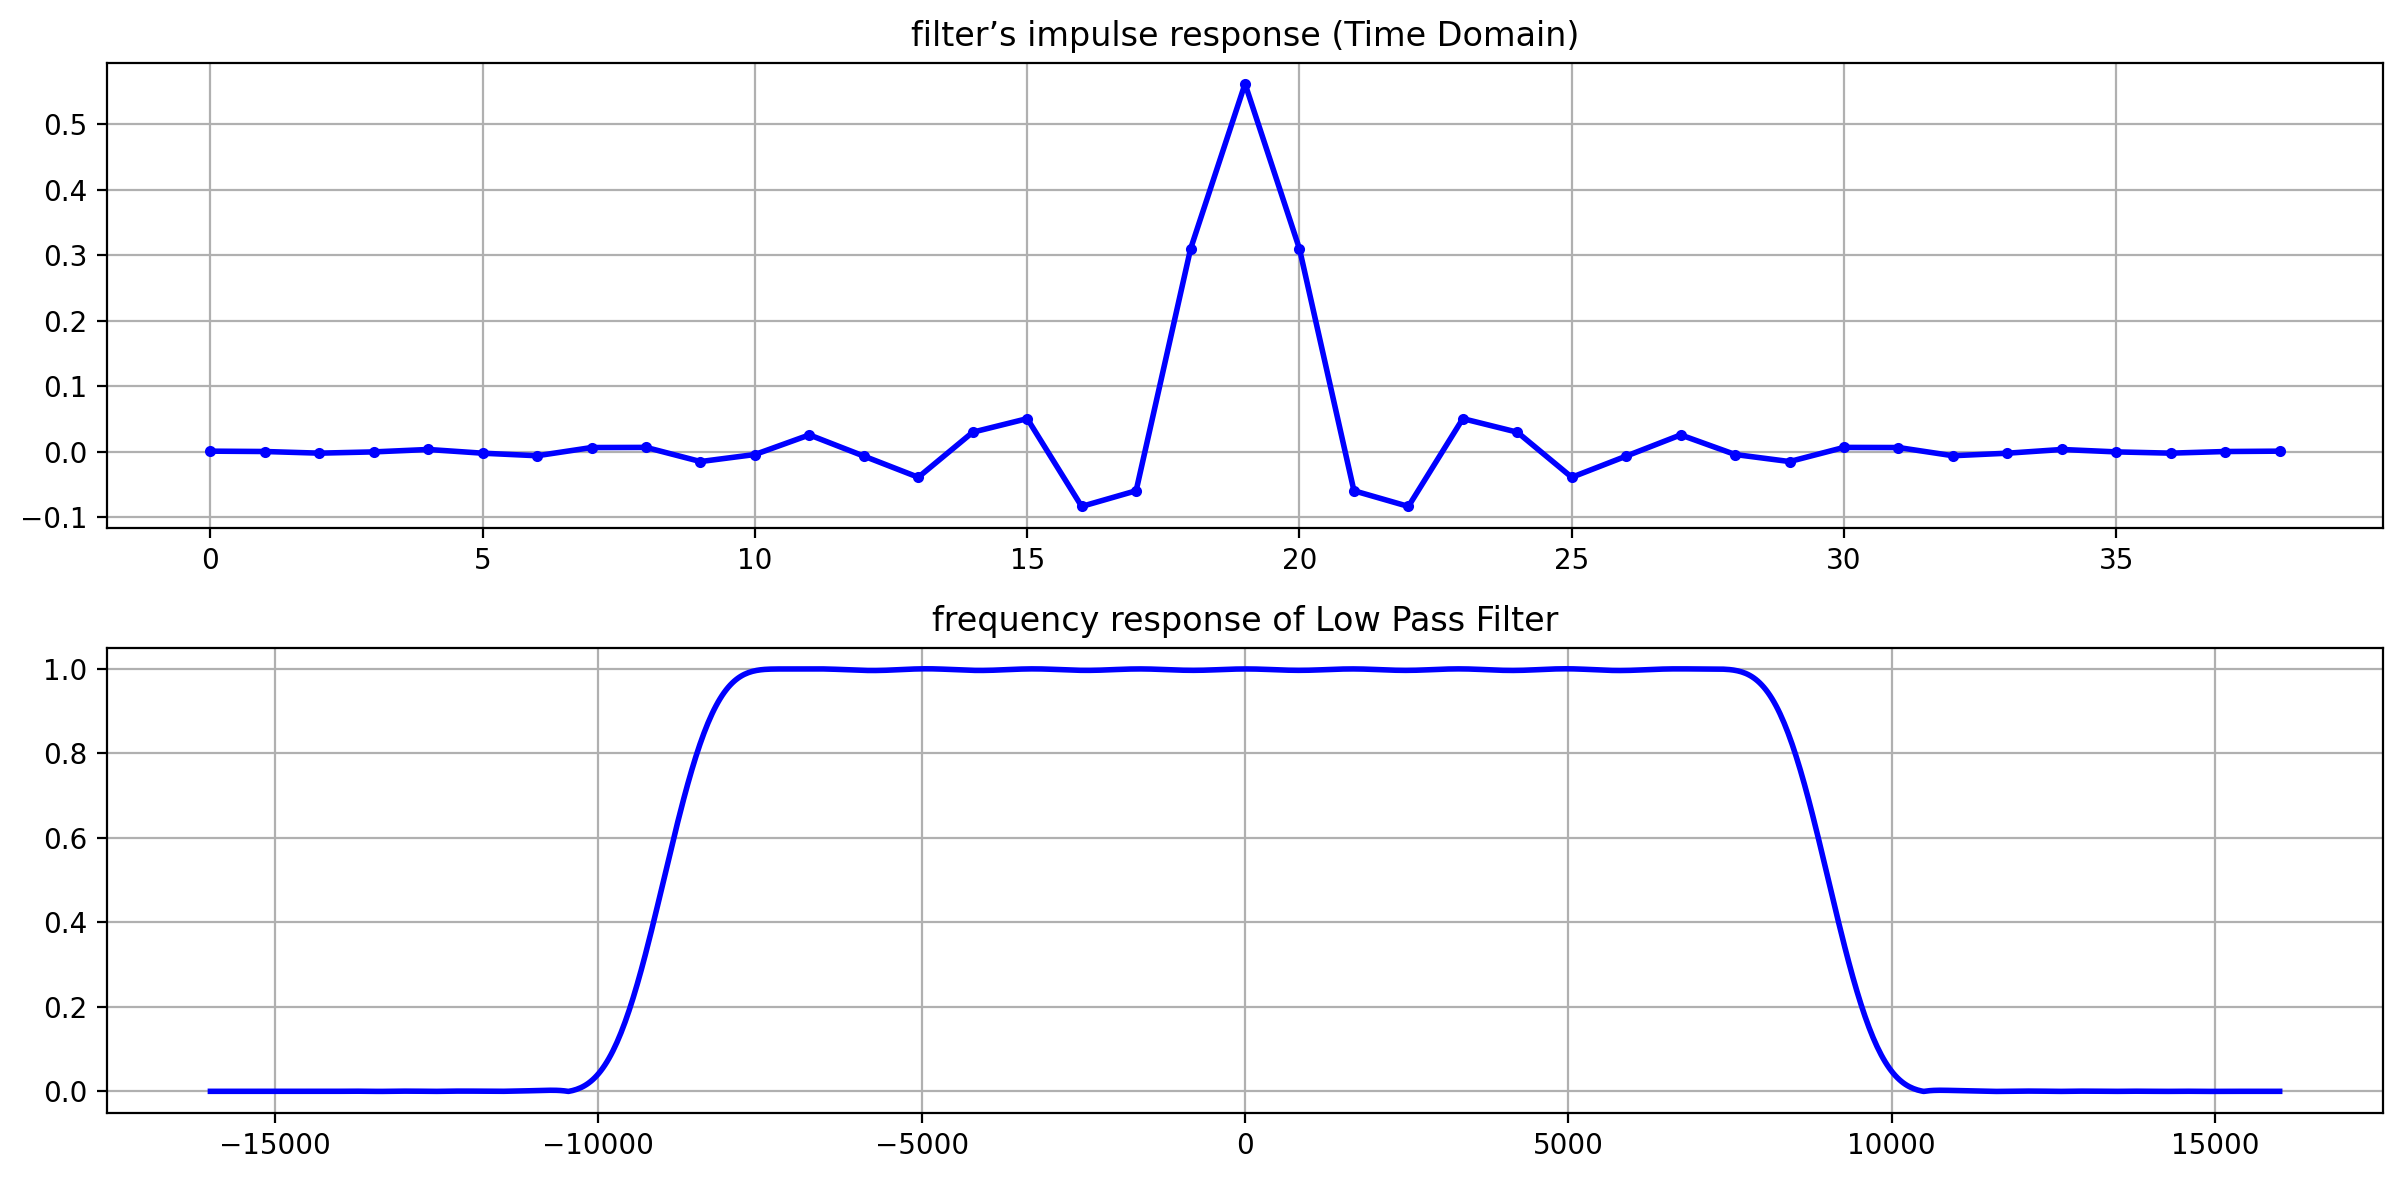

In [37]:
# Simply plotting this array of floats gives us the filter’s impulse response:

# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h, 'b.-', lw=2)
plt.title("filter’s impulse response (Time Domain)")
plt.grid()

# It’s a little more complicated because we have to create the x-axis array of frequencies.

# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.subplot(212)
plt.plot(w, H, 'b-', lw=2)
plt.title("frequency response of Low Pass Filter")
plt.grid()
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

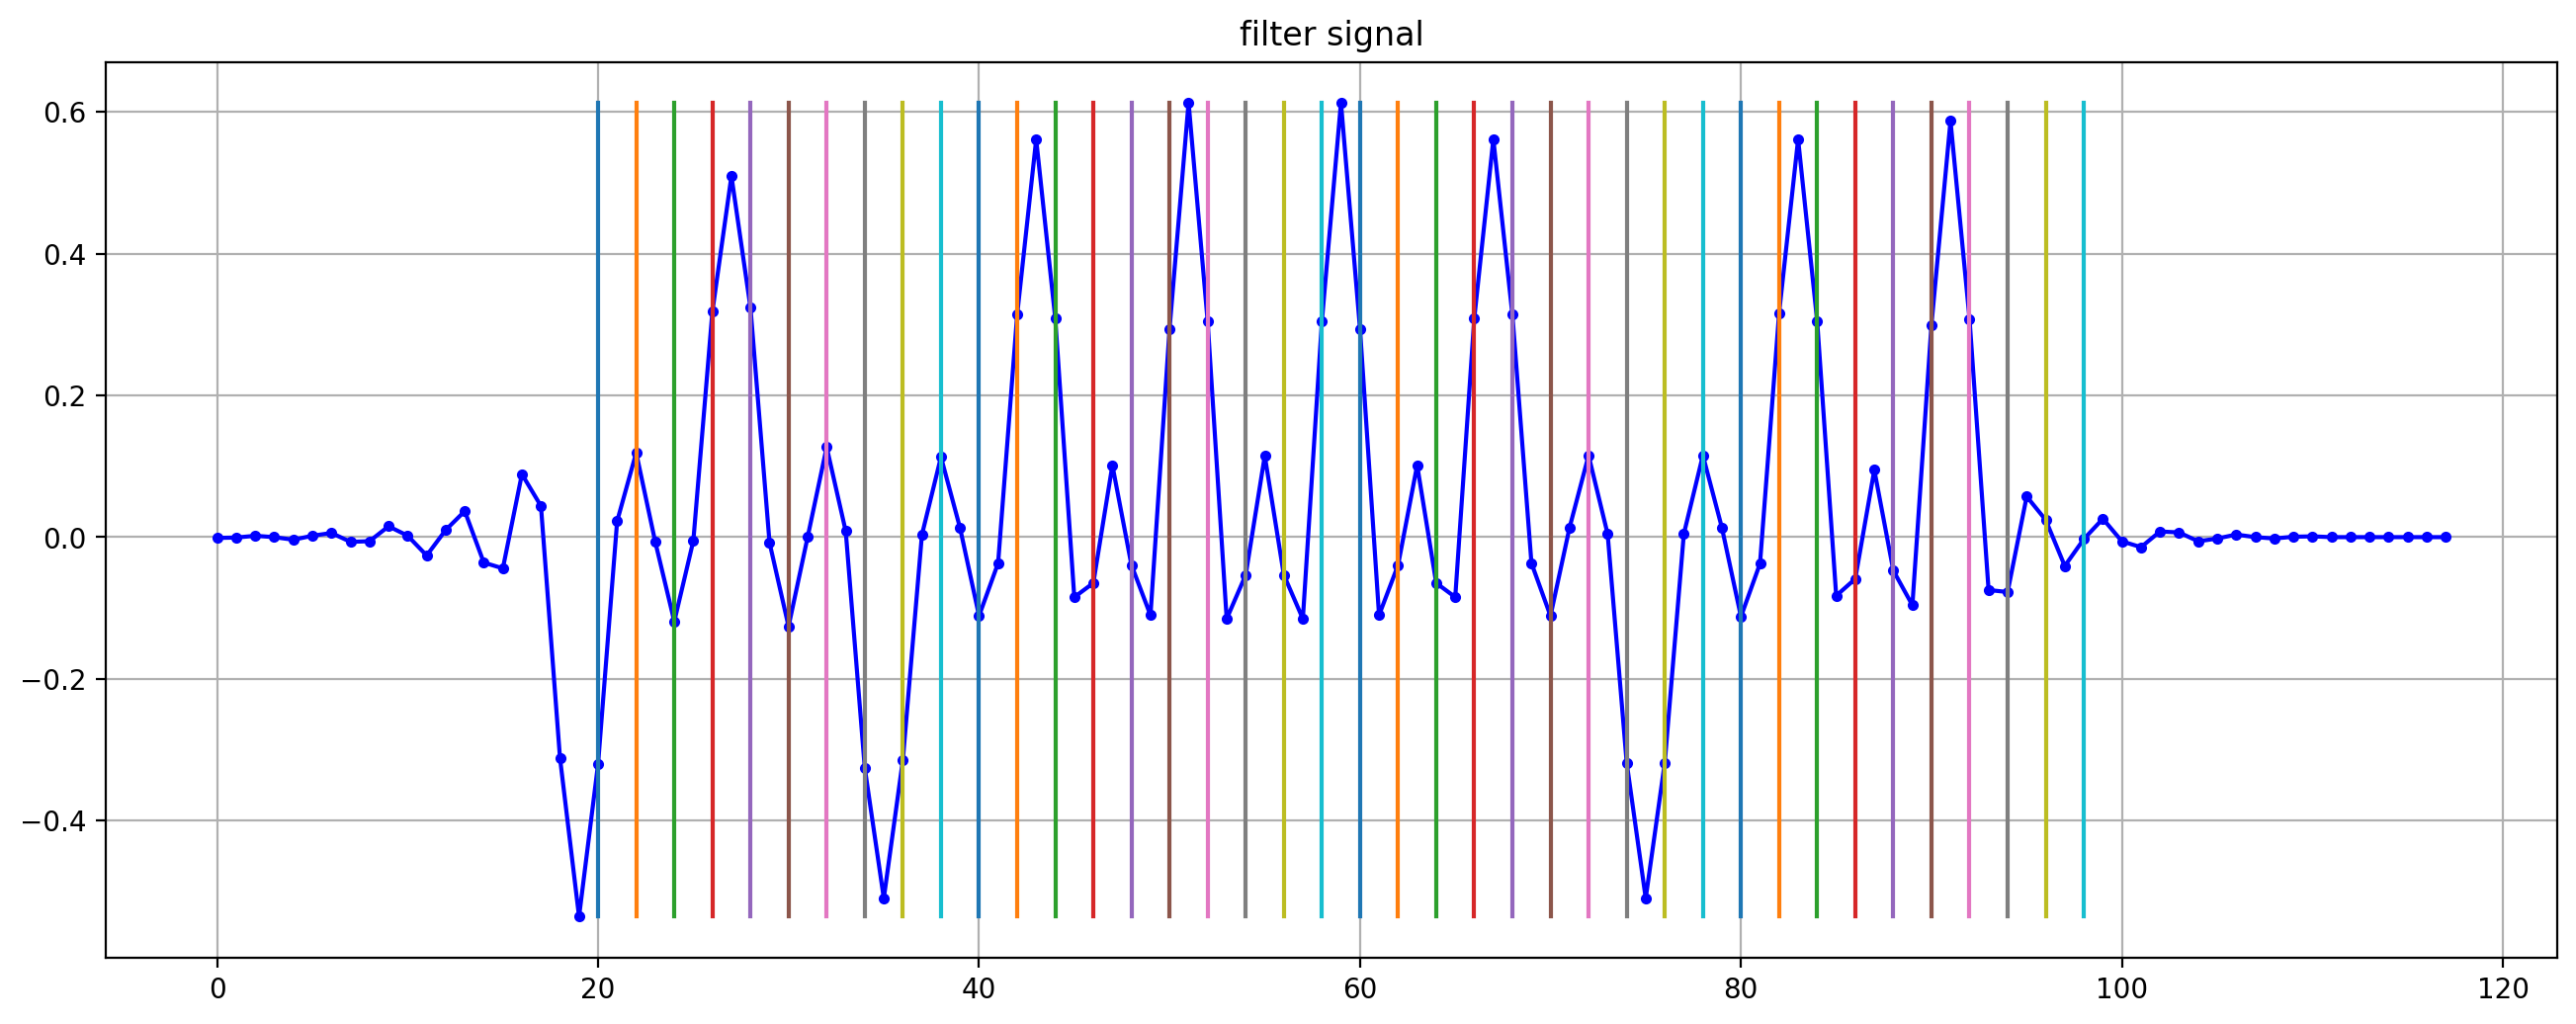

In [7]:
x = np.array([-1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
            0., 0., 0., -1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
            0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
            0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
            0., 0., 0., 0., -1., 0., 0., 0., 0., 0., 0., 0., 1.,
            0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
            0., 0.])
num_symbols = 40
sps = 2
# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x, h)
plt.figure(2)
plt.figure(figsize=(16,6))
plt.plot(x_shaped, 'b.-')
for i in range(num_symbols):
    plt.plot([i*sps+num_taps//2+1,i*sps+num_taps//2+1], [min(x_shaped), max(x_shaped)])
plt.grid(True)
plt.title("filter signal")
plt.show()

In [8]:
# Now let's increase the no of taps.

In [9]:
h = np.array([3.6373836414559675e-18, 0.0005377039196901023, -0.00022217231162358075, -0.0005222753388807178, 0.0004892038996331394, 0.0004292246012482792, -0.0008049802272580564, -0.00019293710647616535, 0.0011265570065006614, -0.0002507153549231589, -0.0013541772495955229, 0.0009275684715248644, 0.0013419616734609008, -0.0017891278257593513, -0.0009309935267083347, 0.002689739689230919, -6.794510768757016e-18, -0.003387827891856432, 0.0014772089198231697, 0.0035772579722106457, -0.0033823116682469845, -0.0029478147625923157, 0.005426356103271246, 0.001266065752133727, -0.007158888969570398, 0.0015385478036478162, 0.008017471991479397, -0.005300845485180616, -0.007413801271468401, 0.0095776142552495, 0.004843553993850946, -0.013647135347127914, 1.687668645087238e-17, 0.016550838947296143, -0.007131889462471008, -0.017161205410957336, 0.016222510486841202, 0.014235337264835835, -0.026601091027259827, -0.006362259853631258, 0.03732054680585861, -0.008446830324828625, -0.04727674648165703, 0.03449041768908501, 0.05536394566297531, -0.08740424364805222, -0.060640156269073486, 0.3117518723011017, 0.5622578263282776, 0.3117518723011017, -0.060640156269073486, -0.08740424364805222, 0.05536394566297531, 0.03449041768908501, -0.04727674648165703, -0.008446830324828625, 0.03732054680585861, -0.006362259853631258, -0.026601091027259827, 0.014235337264835835, 0.016222510486841202, -0.017161205410957336, -0.007131889462471008, 0.016550838947296143, 1.687668645087238e-17, -0.013647135347127914, 0.004843553993850946, 0.0095776142552495, -0.007413801271468401, -0.005300845485180616, 0.008017471991479397, 0.0015385478036478162, -0.007158888969570398, 0.001266065752133727, 0.005426356103271246, -0.0029478147625923157, -0.0033823116682469845, 0.0035772579722106457, 0.0014772089198231697, -0.003387827891856432, -6.794510768757016e-18, 0.002689739689230919, -0.0009309935267083347, -0.0017891278257593513, 0.0013419616734609008, 0.0009275684715248644, -0.0013541772495955229, -0.0002507153549231589, 0.0011265570065006614, -0.00019293710647616535, -0.0008049802272580564, 0.0004292246012482792, 0.0004892038996331394, -0.0005222753388807178, -0.00022217231162358075, 0.0005377039196901023, 3.6373836414559675e-18])
h

array([ 3.63738364e-18,  5.37703920e-04, -2.22172312e-04, -5.22275339e-04,
        4.89203900e-04,  4.29224601e-04, -8.04980227e-04, -1.92937106e-04,
        1.12655701e-03, -2.50715355e-04, -1.35417725e-03,  9.27568472e-04,
        1.34196167e-03, -1.78912783e-03, -9.30993527e-04,  2.68973969e-03,
       -6.79451077e-18, -3.38782789e-03,  1.47720892e-03,  3.57725797e-03,
       -3.38231167e-03, -2.94781476e-03,  5.42635610e-03,  1.26606575e-03,
       -7.15888897e-03,  1.53854780e-03,  8.01747199e-03, -5.30084549e-03,
       -7.41380127e-03,  9.57761426e-03,  4.84355399e-03, -1.36471353e-02,
        1.68766865e-17,  1.65508389e-02, -7.13188946e-03, -1.71612054e-02,
        1.62225105e-02,  1.42353373e-02, -2.66010910e-02, -6.36225985e-03,
        3.73205468e-02, -8.44683032e-03, -4.72767465e-02,  3.44904177e-02,
        5.53639457e-02, -8.74042436e-02, -6.06401563e-02,  3.11751872e-01,
        5.62257826e-01,  3.11751872e-01, -6.06401563e-02, -8.74042436e-02,
        5.53639457e-02,  

In [10]:
len(h)

97

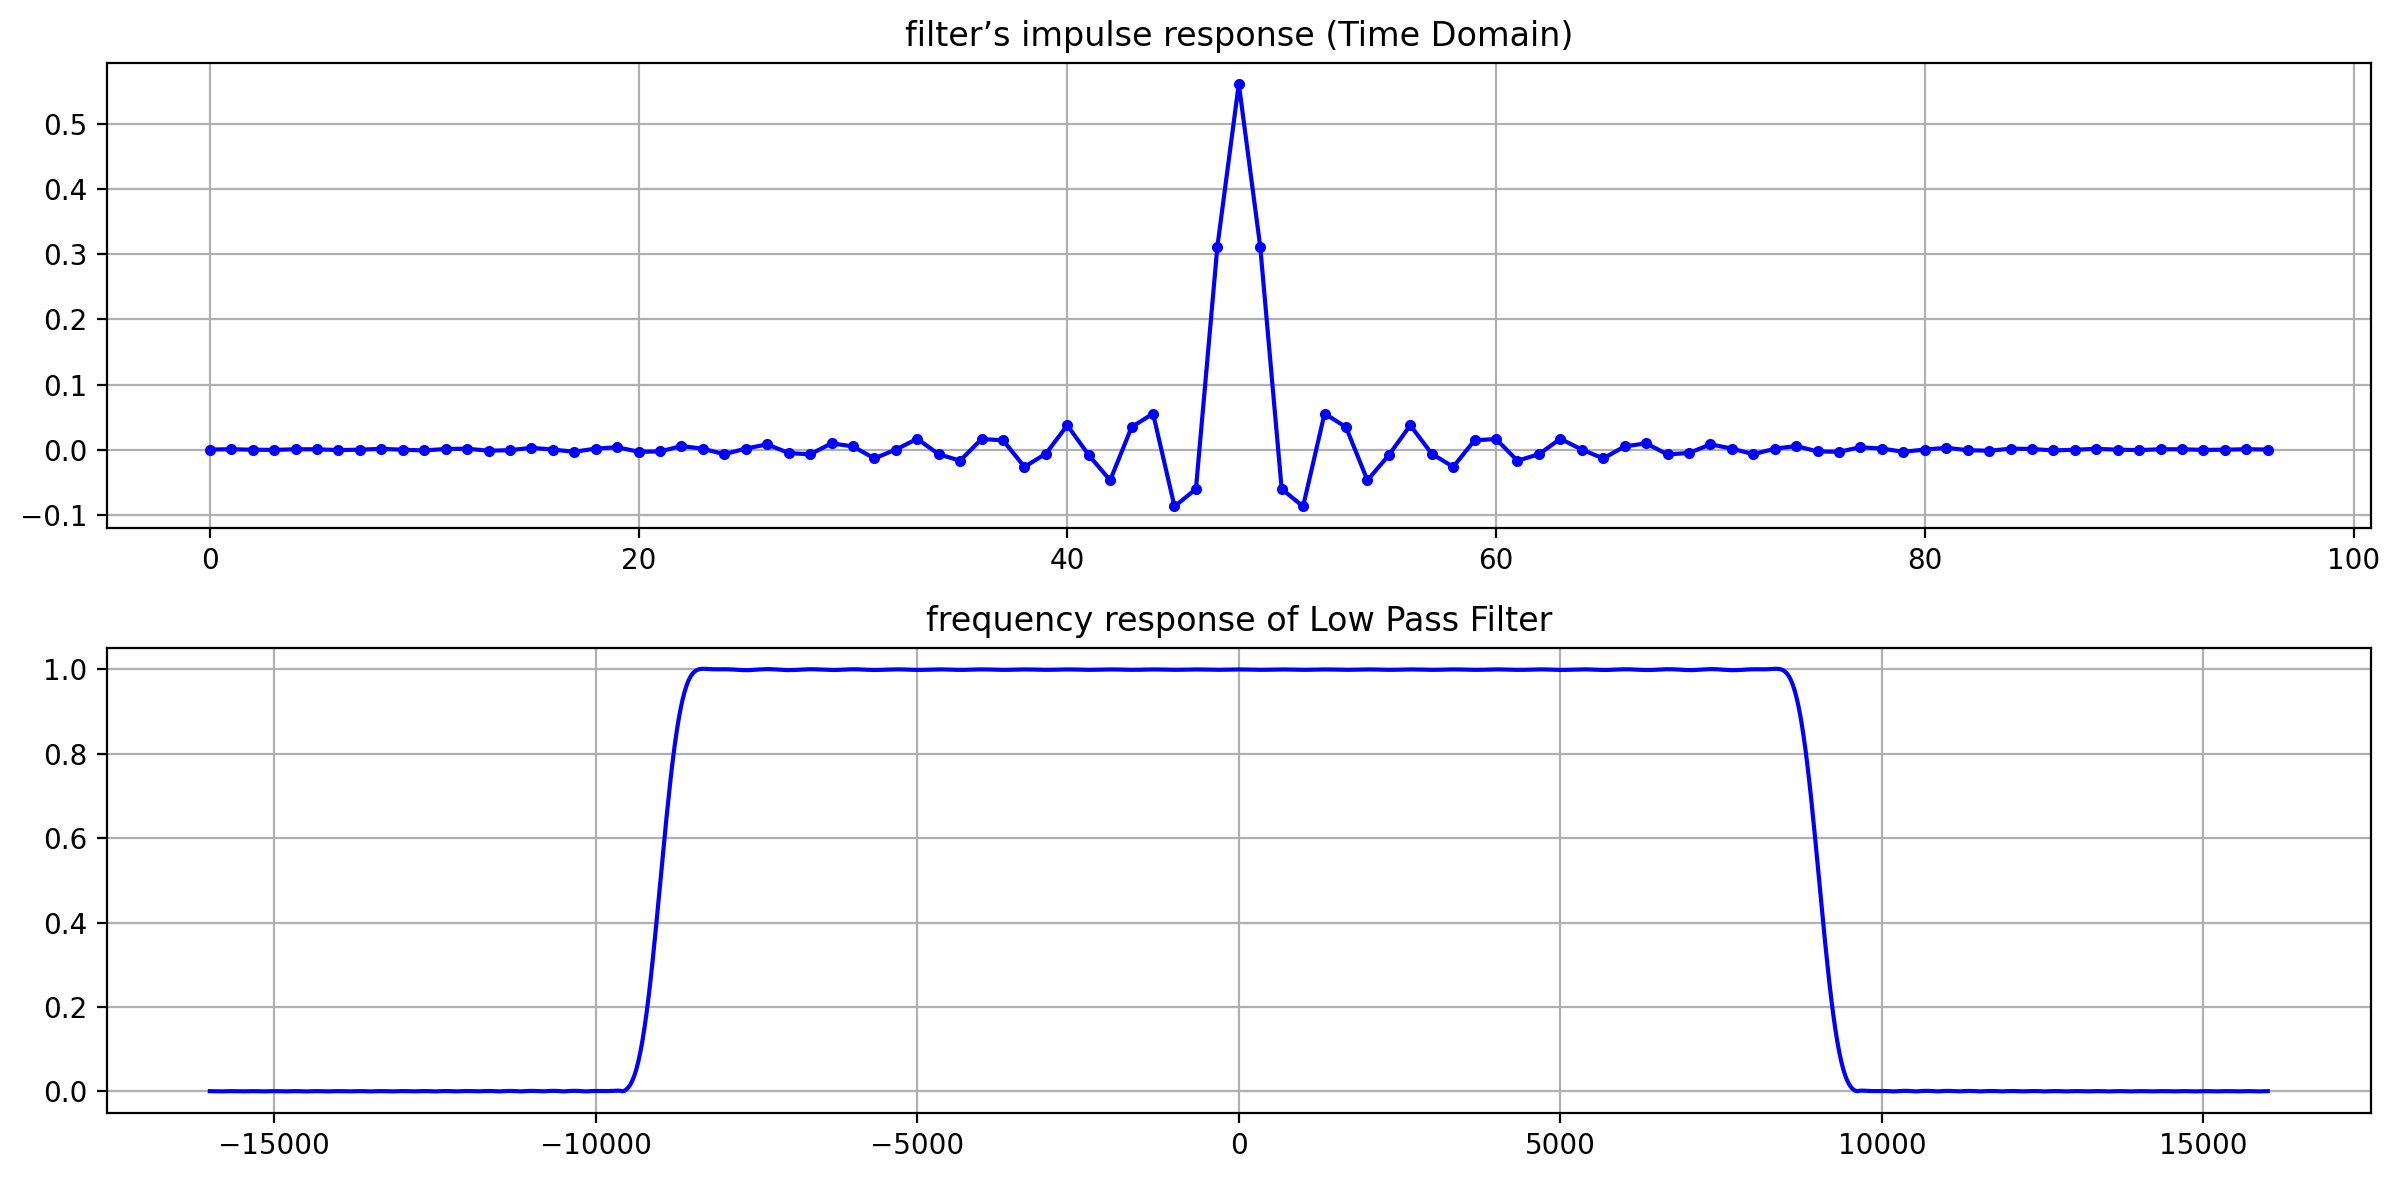

In [12]:
# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h, 'b.-')
plt.title("filter’s impulse response (Time Domain)")
plt.grid()

# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.subplot(212)
plt.plot(w, H, 'b-')
plt.title("frequency response of Low Pass Filter")
plt.grid()
plt.tight_layout()

# High Pass Filter

This is number of High pass filter taps :- 	 53

This is High Pass coefficient : 	 (-1.685441786136721e-10, -3.28107989844284e-06, -7.11629691068083e-05, -3.34060714521911e-05, 0.0003036673879250884, 0.00031054203282110393, -0.0006233309395611286, -0.001097607659175992, 0.000728161889128387, 0.002611292526125908, -3.1178581752861657e-18, -0.004776697605848312, -0.002454138593748212, 0.006922032684087753, 0.007551297079771757, -0.0075371176935732365, -0.01580454781651497, 0.004187681712210178, 0.02688390575349331, 0.006581811234354973, -0.03940187394618988, -0.030412249267101288, 0.05110287293791771, 0.08358052372932434, -0.05946314334869385, -0.310330867767334, 0.5625019073486328, -0.310330867767334, -0.05946314334869385, 0.08358052372932434, 0.05110287666320801, -0.03041224554181099, -0.03940187394618988, 0.0065818121656775475, 0.026883911341428757, 0.004187682643532753, -0.015804549679160118, -0.0075371176935732365, 0.007551298011094332, 0.006922031287103891, -0.002454138360917568, -0.004776696674525738, -3.1178571413104e-18, 0.0026112915948033333, 0.0007281622383743525, -0.0010976080084219575, -0.000623331347014755, 0.0003105421783402562, 0.00030366735882125795, -3.3405991416657344e-05, -7.11630709702149e-05, -3.281098315710551e-06, -1.685441786136721e-10)



In [13]:
h = np.array([-1.685441786136721e-10, -3.28107989844284e-06, -7.11629691068083e-05, -3.34060714521911e-05, 0.0003036673879250884, 0.00031054203282110393, -0.0006233309395611286, -0.001097607659175992, 0.000728161889128387, 0.002611292526125908, -3.1178581752861657e-18, -0.004776697605848312, -0.002454138593748212, 0.006922032684087753, 0.007551297079771757, -0.0075371176935732365, -0.01580454781651497, 0.004187681712210178, 0.02688390575349331, 0.006581811234354973, -0.03940187394618988, -0.030412249267101288, 0.05110287293791771, 0.08358052372932434, -0.05946314334869385, -0.310330867767334, 0.5625019073486328, -0.310330867767334, -0.05946314334869385, 0.08358052372932434, 0.05110287666320801, -0.03041224554181099, -0.03940187394618988, 0.0065818121656775475, 0.026883911341428757, 0.004187682643532753, -0.015804549679160118, -0.0075371176935732365, 0.007551298011094332, 0.006922031287103891, -0.002454138360917568, -0.004776696674525738, -3.1178571413104e-18, 0.0026112915948033333, 0.0007281622383743525, -0.0010976080084219575, -0.000623331347014755, 0.0003105421783402562, 0.00030366735882125795, -3.3405991416657344e-05, -7.11630709702149e-05, -3.281098315710551e-06, -1.685441786136721e-10])
h

array([-1.68544179e-10, -3.28107990e-06, -7.11629691e-05, -3.34060715e-05,
        3.03667388e-04,  3.10542033e-04, -6.23330940e-04, -1.09760766e-03,
        7.28161889e-04,  2.61129253e-03, -3.11785818e-18, -4.77669761e-03,
       -2.45413859e-03,  6.92203268e-03,  7.55129708e-03, -7.53711769e-03,
       -1.58045478e-02,  4.18768171e-03,  2.68839058e-02,  6.58181123e-03,
       -3.94018739e-02, -3.04122493e-02,  5.11028729e-02,  8.35805237e-02,
       -5.94631433e-02, -3.10330868e-01,  5.62501907e-01, -3.10330868e-01,
       -5.94631433e-02,  8.35805237e-02,  5.11028767e-02, -3.04122455e-02,
       -3.94018739e-02,  6.58181217e-03,  2.68839113e-02,  4.18768264e-03,
       -1.58045497e-02, -7.53711769e-03,  7.55129801e-03,  6.92203129e-03,
       -2.45413836e-03, -4.77669667e-03, -3.11785714e-18,  2.61129159e-03,
        7.28162238e-04, -1.09760801e-03, -6.23331347e-04,  3.10542178e-04,
        3.03667359e-04, -3.34059914e-05, -7.11630710e-05, -3.28109832e-06,
       -1.68544179e-10])

In [14]:
len(h)

53

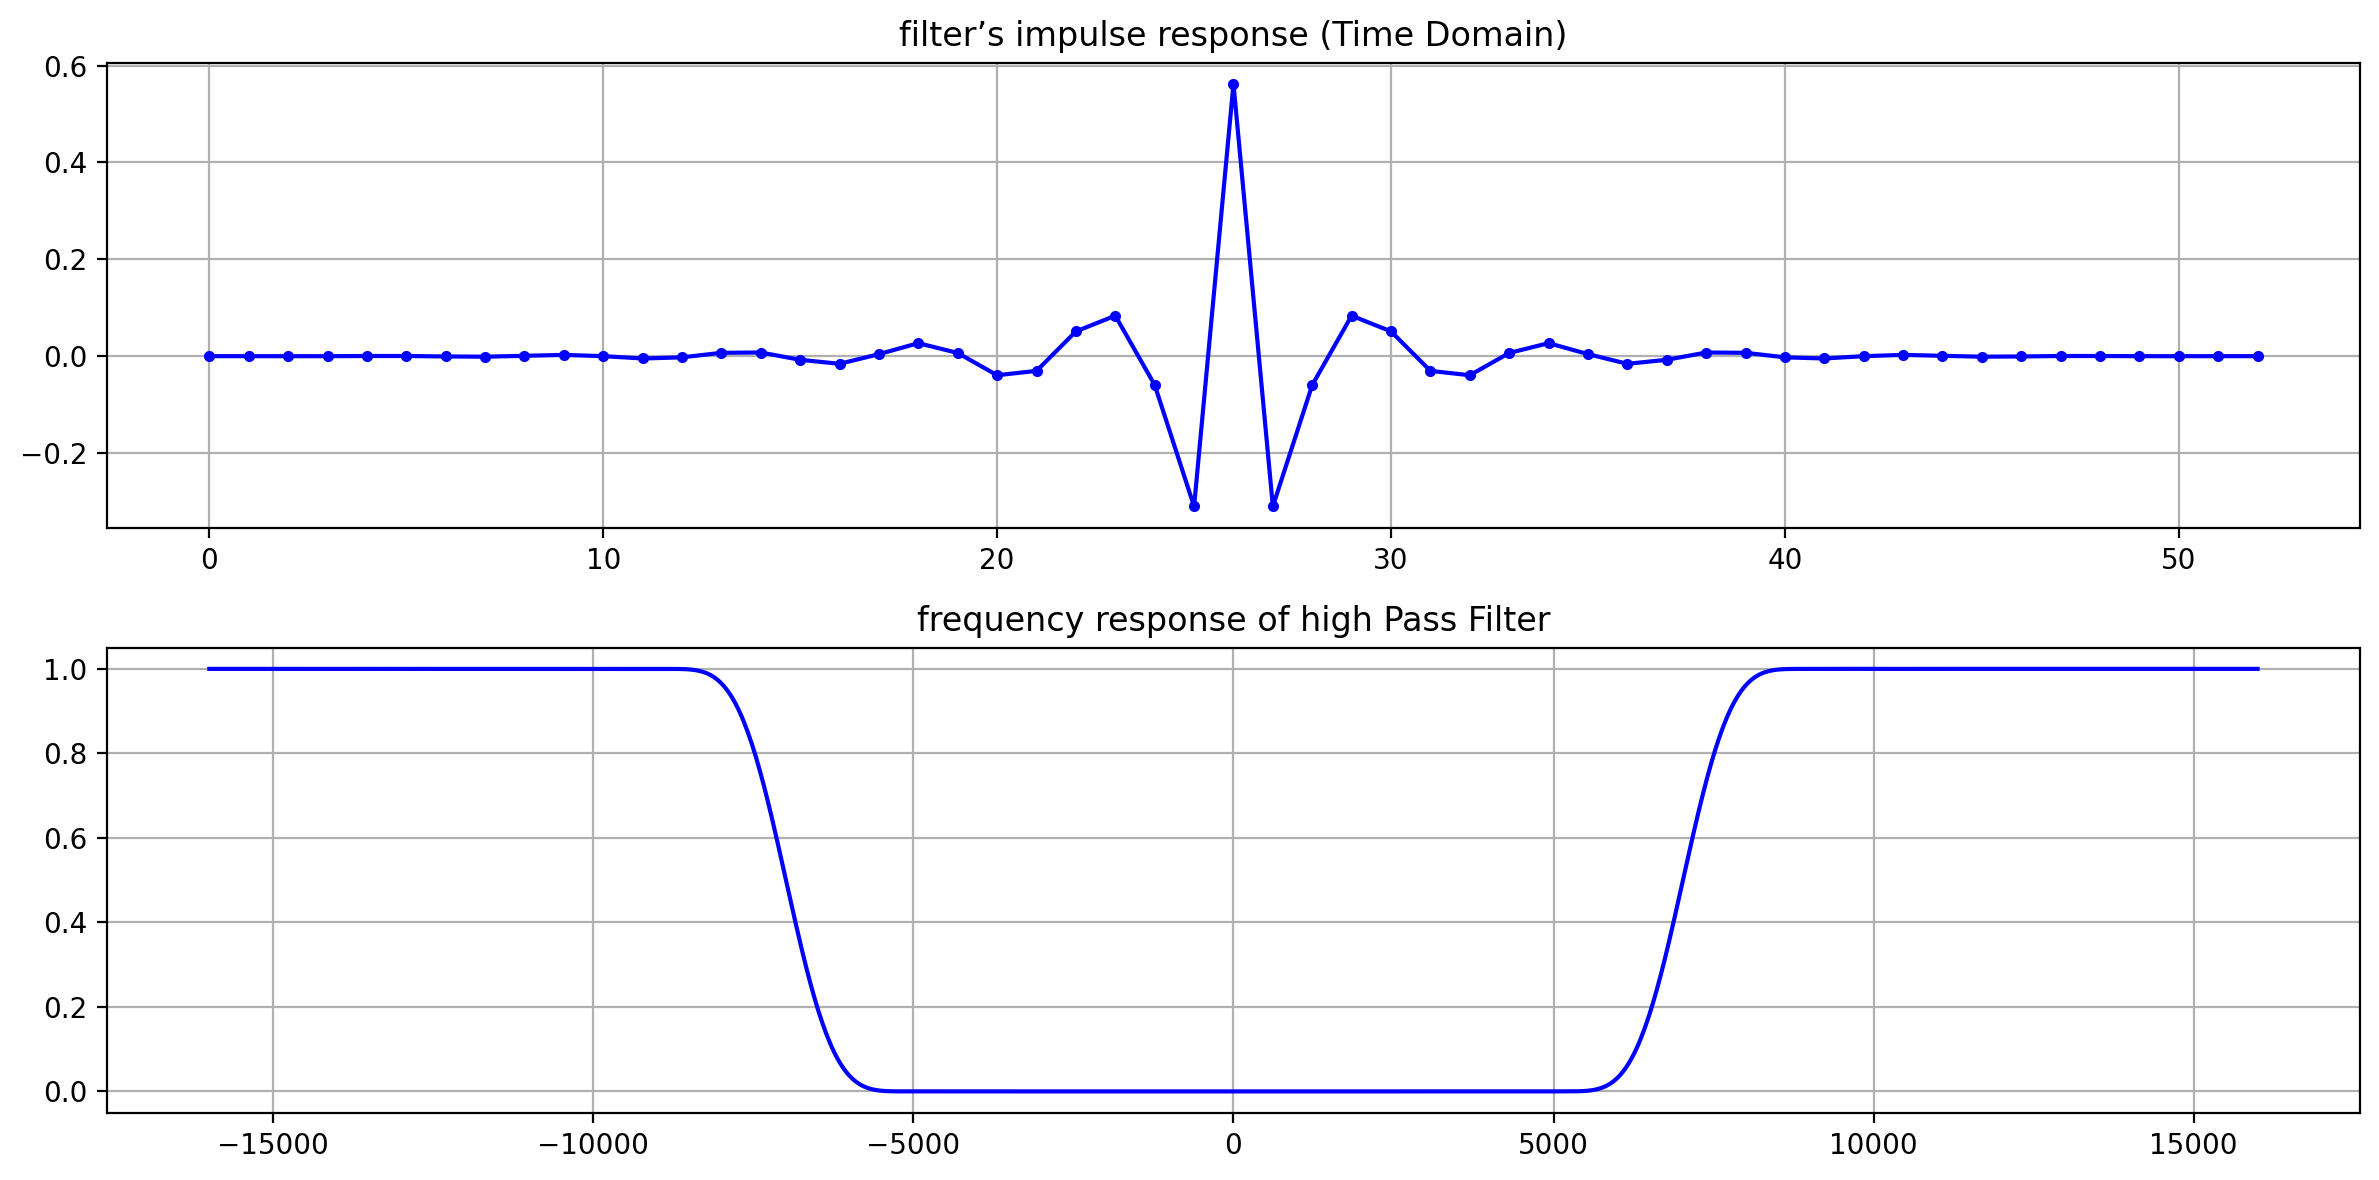

In [15]:
# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h, 'b.-')
plt.title("filter’s impulse response (Time Domain)")
plt.grid()


# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.subplot(212)
plt.plot(w, H, 'b-')
plt.title("frequency response of high Pass Filter")
plt.grid()
plt.tight_layout()

# Band Stop Filter

This is number of Band Stop filter taps:- 	 33

This is Band Stop coefficient : 	 (-0.0, 6.115849814802425e-19, 0.001600142801180482, -1.0372983847757876e-17, -0.005497726146131754, 3.572157968614324e-18, -0.007525191642343998, 3.3210404930220054e-17, 0.03981805220246315, -5.735965505485253e-17, -0.028091901913285255, -1.6504071363419294e-17, -0.09612929075956345, 1.2144543992517385e-16, 0.28309565782546997, -7.005153056206196e-17, 0.6254605054855347, -7.005153056206196e-17, 0.28309565782546997, 1.2144543992517385e-16, -0.09612929075956345, -1.6504071363419294e-17, -0.028091901913285255, -5.735965505485253e-17, 0.03981805220246315, 3.3210404930220054e-17, -0.007525191642343998, 3.572157968614324e-18, -0.005497726146131754, -1.0372983847757876e-17, 0.001600142801180482, 6.115849814802425e-19, -0.0)



In [16]:
h = np.array([-0.0, 6.115849814802425e-19, 0.001600142801180482, -1.0372983847757876e-17, -0.005497726146131754, 3.572157968614324e-18, -0.007525191642343998, 3.3210404930220054e-17, 0.03981805220246315, -5.735965505485253e-17, -0.028091901913285255, -1.6504071363419294e-17, -0.09612929075956345, 1.2144543992517385e-16, 0.28309565782546997, -7.005153056206196e-17, 0.6254605054855347, -7.005153056206196e-17, 0.28309565782546997, 1.2144543992517385e-16, -0.09612929075956345, -1.6504071363419294e-17, -0.028091901913285255, -5.735965505485253e-17, 0.03981805220246315, 3.3210404930220054e-17, -0.007525191642343998, 3.572157968614324e-18, -0.005497726146131754, -1.0372983847757876e-17, 0.001600142801180482, 6.115849814802425e-19, -0.0])
h

array([-0.00000000e+00,  6.11584981e-19,  1.60014280e-03, -1.03729838e-17,
       -5.49772615e-03,  3.57215797e-18, -7.52519164e-03,  3.32104049e-17,
        3.98180522e-02, -5.73596551e-17, -2.80919019e-02, -1.65040714e-17,
       -9.61292908e-02,  1.21445440e-16,  2.83095658e-01, -7.00515306e-17,
        6.25460505e-01, -7.00515306e-17,  2.83095658e-01,  1.21445440e-16,
       -9.61292908e-02, -1.65040714e-17, -2.80919019e-02, -5.73596551e-17,
        3.98180522e-02,  3.32104049e-17, -7.52519164e-03,  3.57215797e-18,
       -5.49772615e-03, -1.03729838e-17,  1.60014280e-03,  6.11584981e-19,
       -0.00000000e+00])

In [17]:
len(h)

33

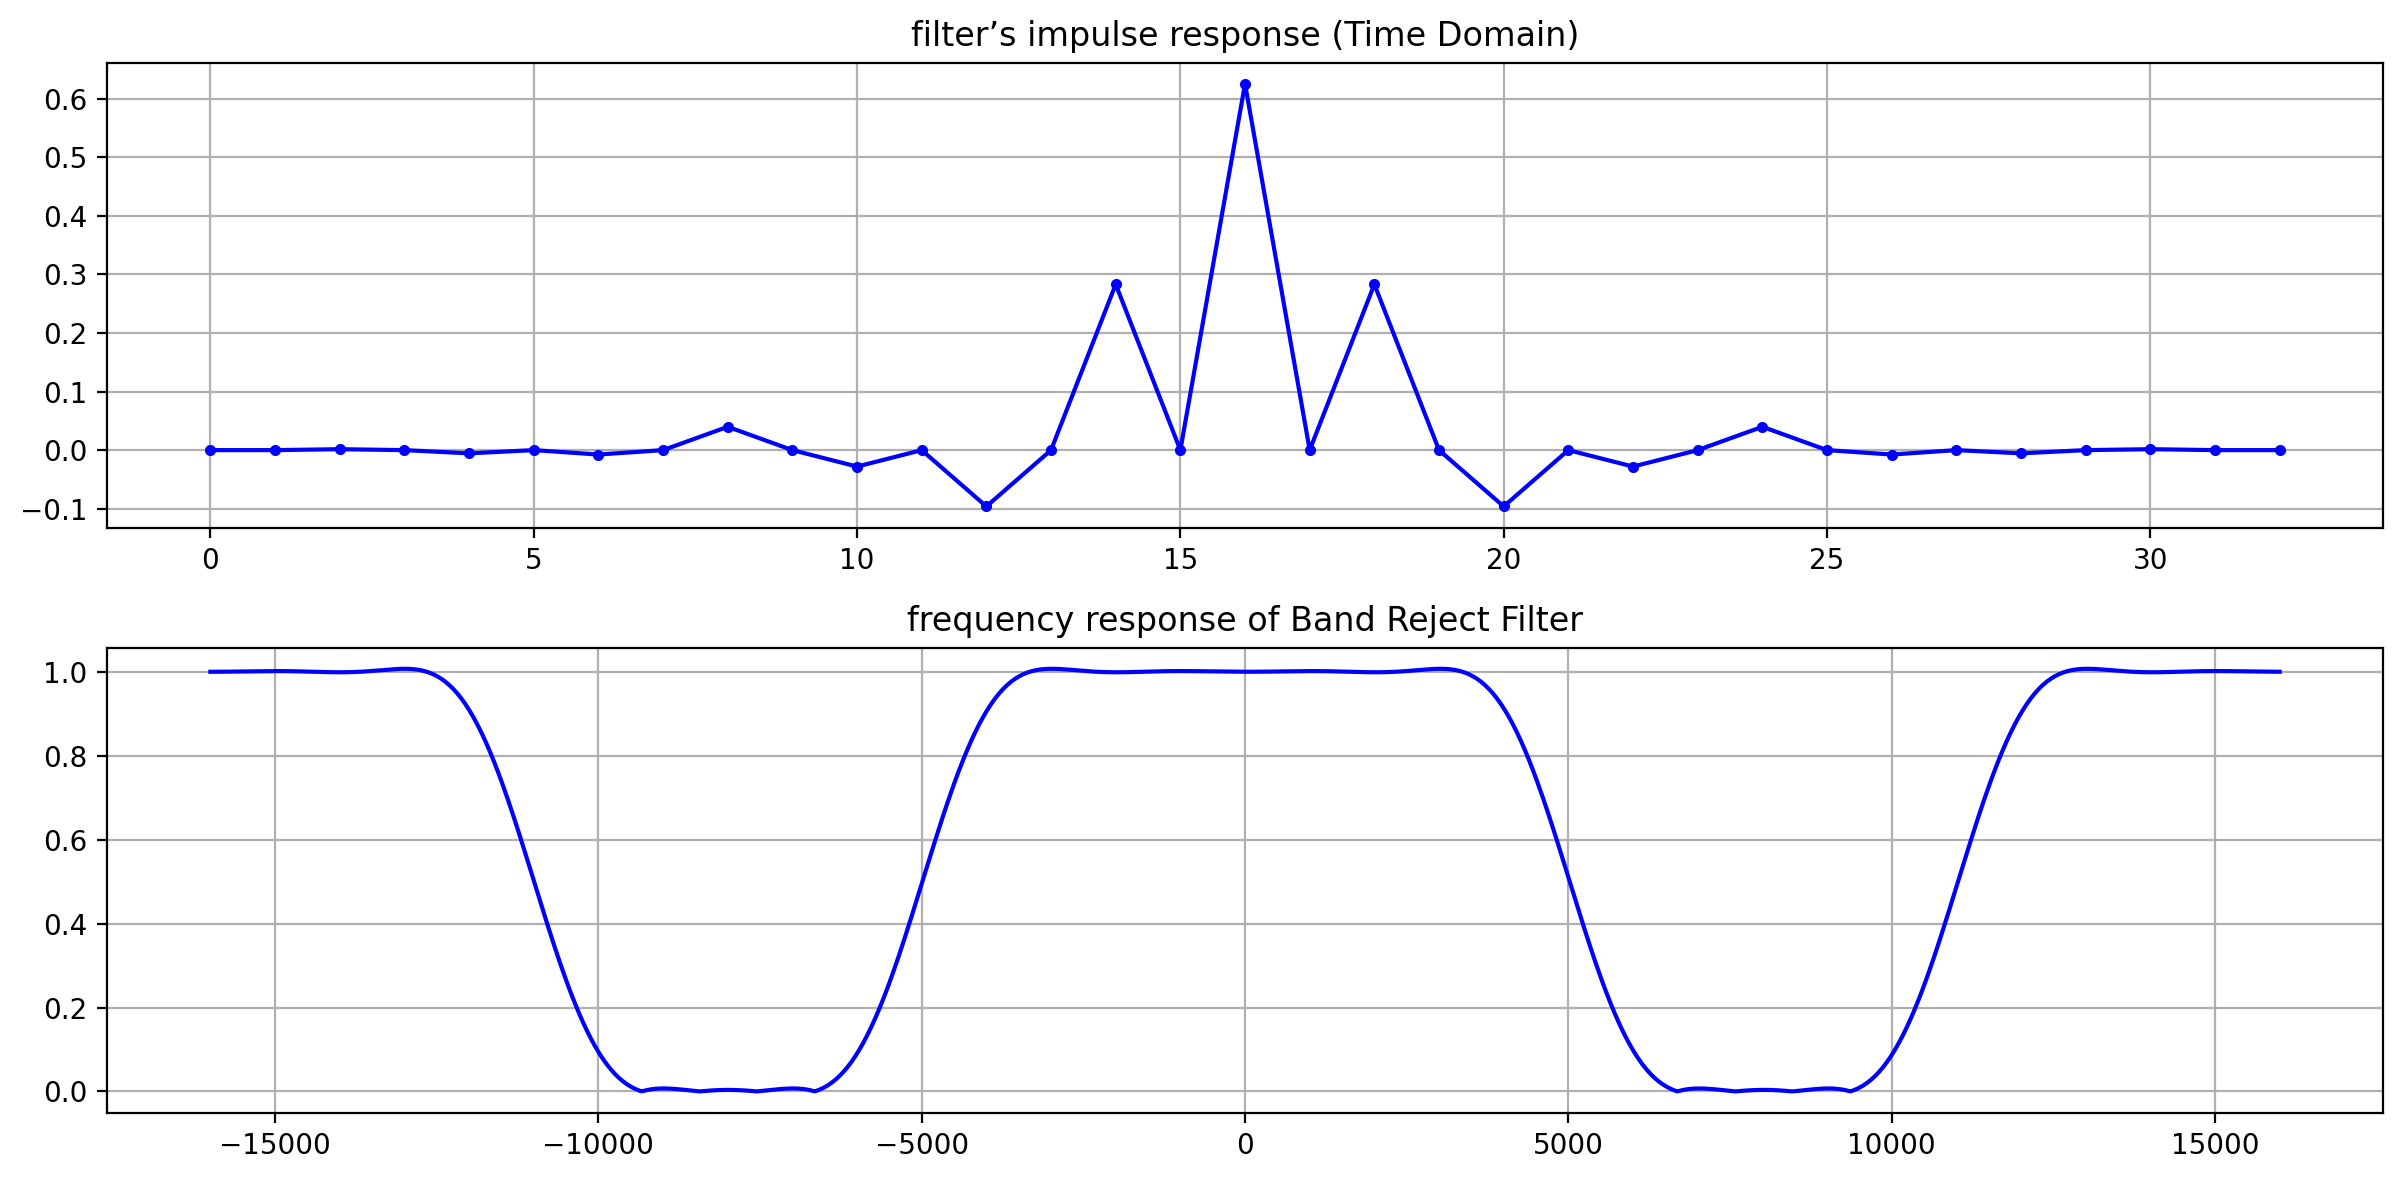

In [18]:
# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h, 'b.-')
plt.title("filter’s impulse response (Time Domain)")
plt.grid()


# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.subplot(212)
plt.plot(w, H, 'b-')
plt.title("frequency response of Band Reject Filter")
plt.grid()
plt.tight_layout()

# Band pass filter

This is number of Band pass filter taps:- 	 15

This is Band Pass coefficient : 	 (8.664751327206447e-17, 0.0366782583296299, 1.91536599056022e-17, 0.10165887326002121, -1.1971037234206222e-16, -0.26564744114875793, 6.384553191576652e-17, 0.3387438654899597, 6.384553191576652e-17, -0.26564744114875793, -1.1971037234206222e-16, 0.10165887326002121, 1.91536599056022e-17, 0.0366782583296299, 8.664751327206447e-17)

In [19]:
h = np.array([8.664751327206447e-17, 0.0366782583296299, 1.91536599056022e-17, 0.10165887326002121, -1.1971037234206222e-16, -0.26564744114875793, 6.384553191576652e-17, 0.3387438654899597, 6.384553191576652e-17, -0.26564744114875793, -1.1971037234206222e-16, 0.10165887326002121, 1.91536599056022e-17, 0.0366782583296299, 8.664751327206447e-17])
h

array([ 8.66475133e-17,  3.66782583e-02,  1.91536599e-17,  1.01658873e-01,
       -1.19710372e-16, -2.65647441e-01,  6.38455319e-17,  3.38743865e-01,
        6.38455319e-17, -2.65647441e-01, -1.19710372e-16,  1.01658873e-01,
        1.91536599e-17,  3.66782583e-02,  8.66475133e-17])

In [20]:
len(h)

15

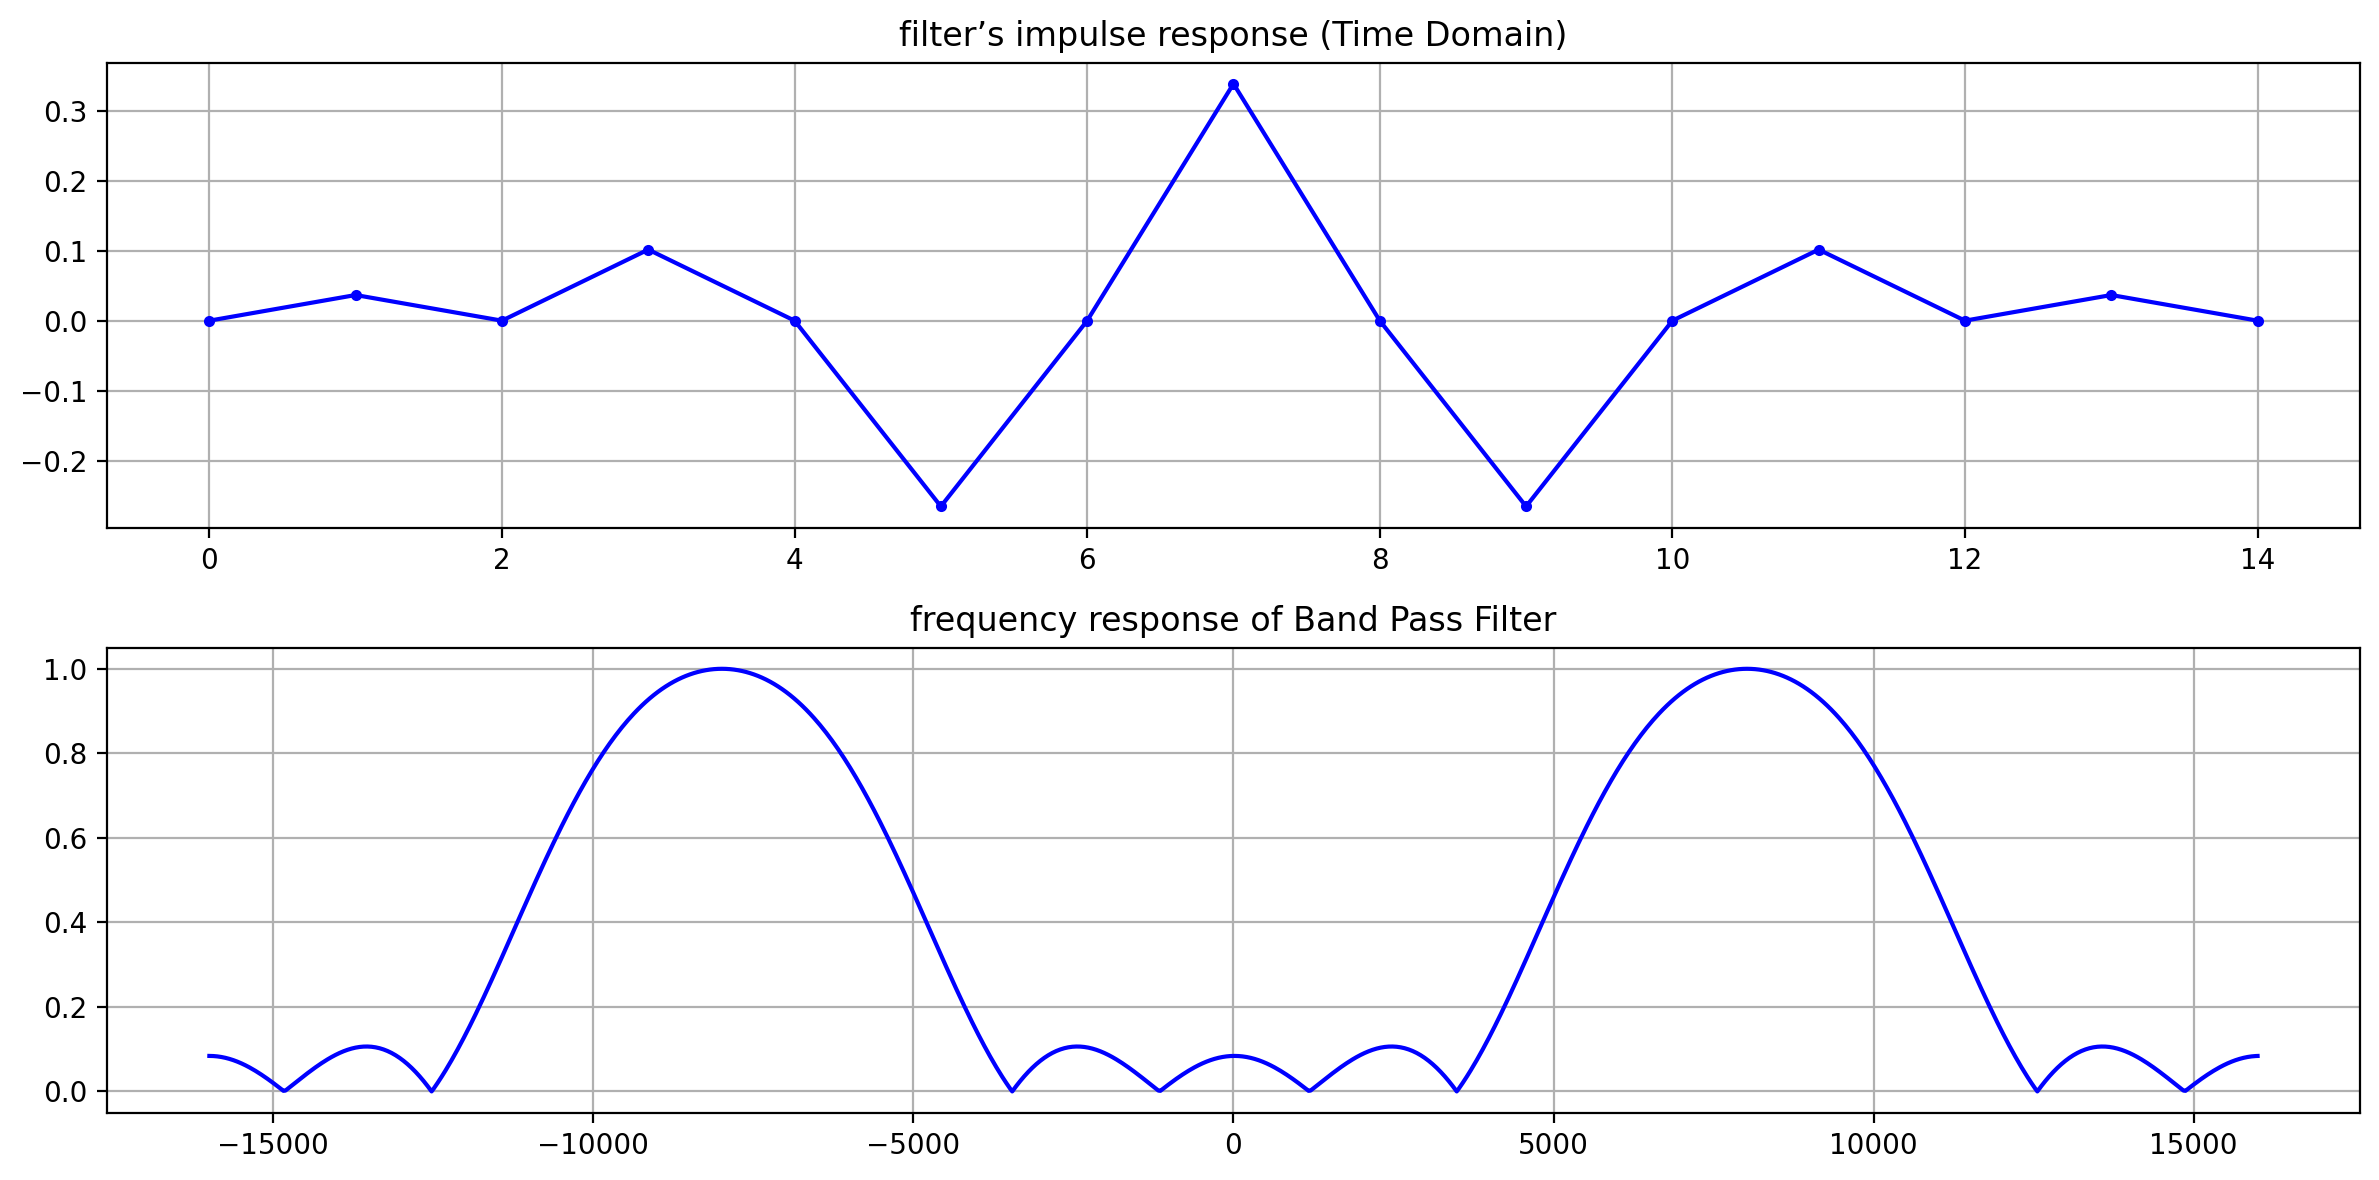

In [21]:
# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h, 'b.-')
plt.title("filter’s impulse response (Time Domain)")
plt.grid()


# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.subplot(212)
plt.plot(w, H, 'b-')
plt.title("frequency response of Band Pass Filter")
plt.grid()
plt.tight_layout()

# Band Pass using Low Pass Filters

In [50]:
# THis is our low pass filter taps
h1 = np.array([0.0011125534074380994, 0.0005828867433592677, -0.001923703937791288, 2.965002642711879e-18, 0.003677754197269678, -0.0019844574853777885, -0.005861950572580099, 0.006651803385466337, 0.006854727864265442, -0.014739028178155422, -0.003981520887464285, 0.025936435908079147, -0.006419215351343155, -0.03873520717024803, 0.030068861320614815, 0.05072862654924393, -0.08319396525621414, -0.059290651232004166, 0.3097267746925354, 0.5615785121917725, 0.3097267746925354, -0.059290651232004166, -0.08319396525621414, 0.05072862654924393, 0.030068861320614815, -0.03873520717024803, -0.006419215351343155, 0.025936435908079147, -0.003981520887464285, -0.014739028178155422, 0.006854727864265442, 0.006651803385466337, -0.005861950572580099, -0.0019844574853777885, 0.003677754197269678, 2.965002642711879e-18, -0.001923703937791288, 0.0005828867433592677, 0.0011125534074380994])
print(h1)

[ 1.11255341e-03  5.82886743e-04 -1.92370394e-03  2.96500264e-18
  3.67775420e-03 -1.98445749e-03 -5.86195057e-03  6.65180339e-03
  6.85472786e-03 -1.47390282e-02 -3.98152089e-03  2.59364359e-02
 -6.41921535e-03 -3.87352072e-02  3.00688613e-02  5.07286265e-02
 -8.31939653e-02 -5.92906512e-02  3.09726775e-01  5.61578512e-01
  3.09726775e-01 -5.92906512e-02 -8.31939653e-02  5.07286265e-02
  3.00688613e-02 -3.87352072e-02 -6.41921535e-03  2.59364359e-02
 -3.98152089e-03 -1.47390282e-02  6.85472786e-03  6.65180339e-03
 -5.86195057e-03 -1.98445749e-03  3.67775420e-03  2.96500264e-18
 -1.92370394e-03  5.82886743e-04  1.11255341e-03]


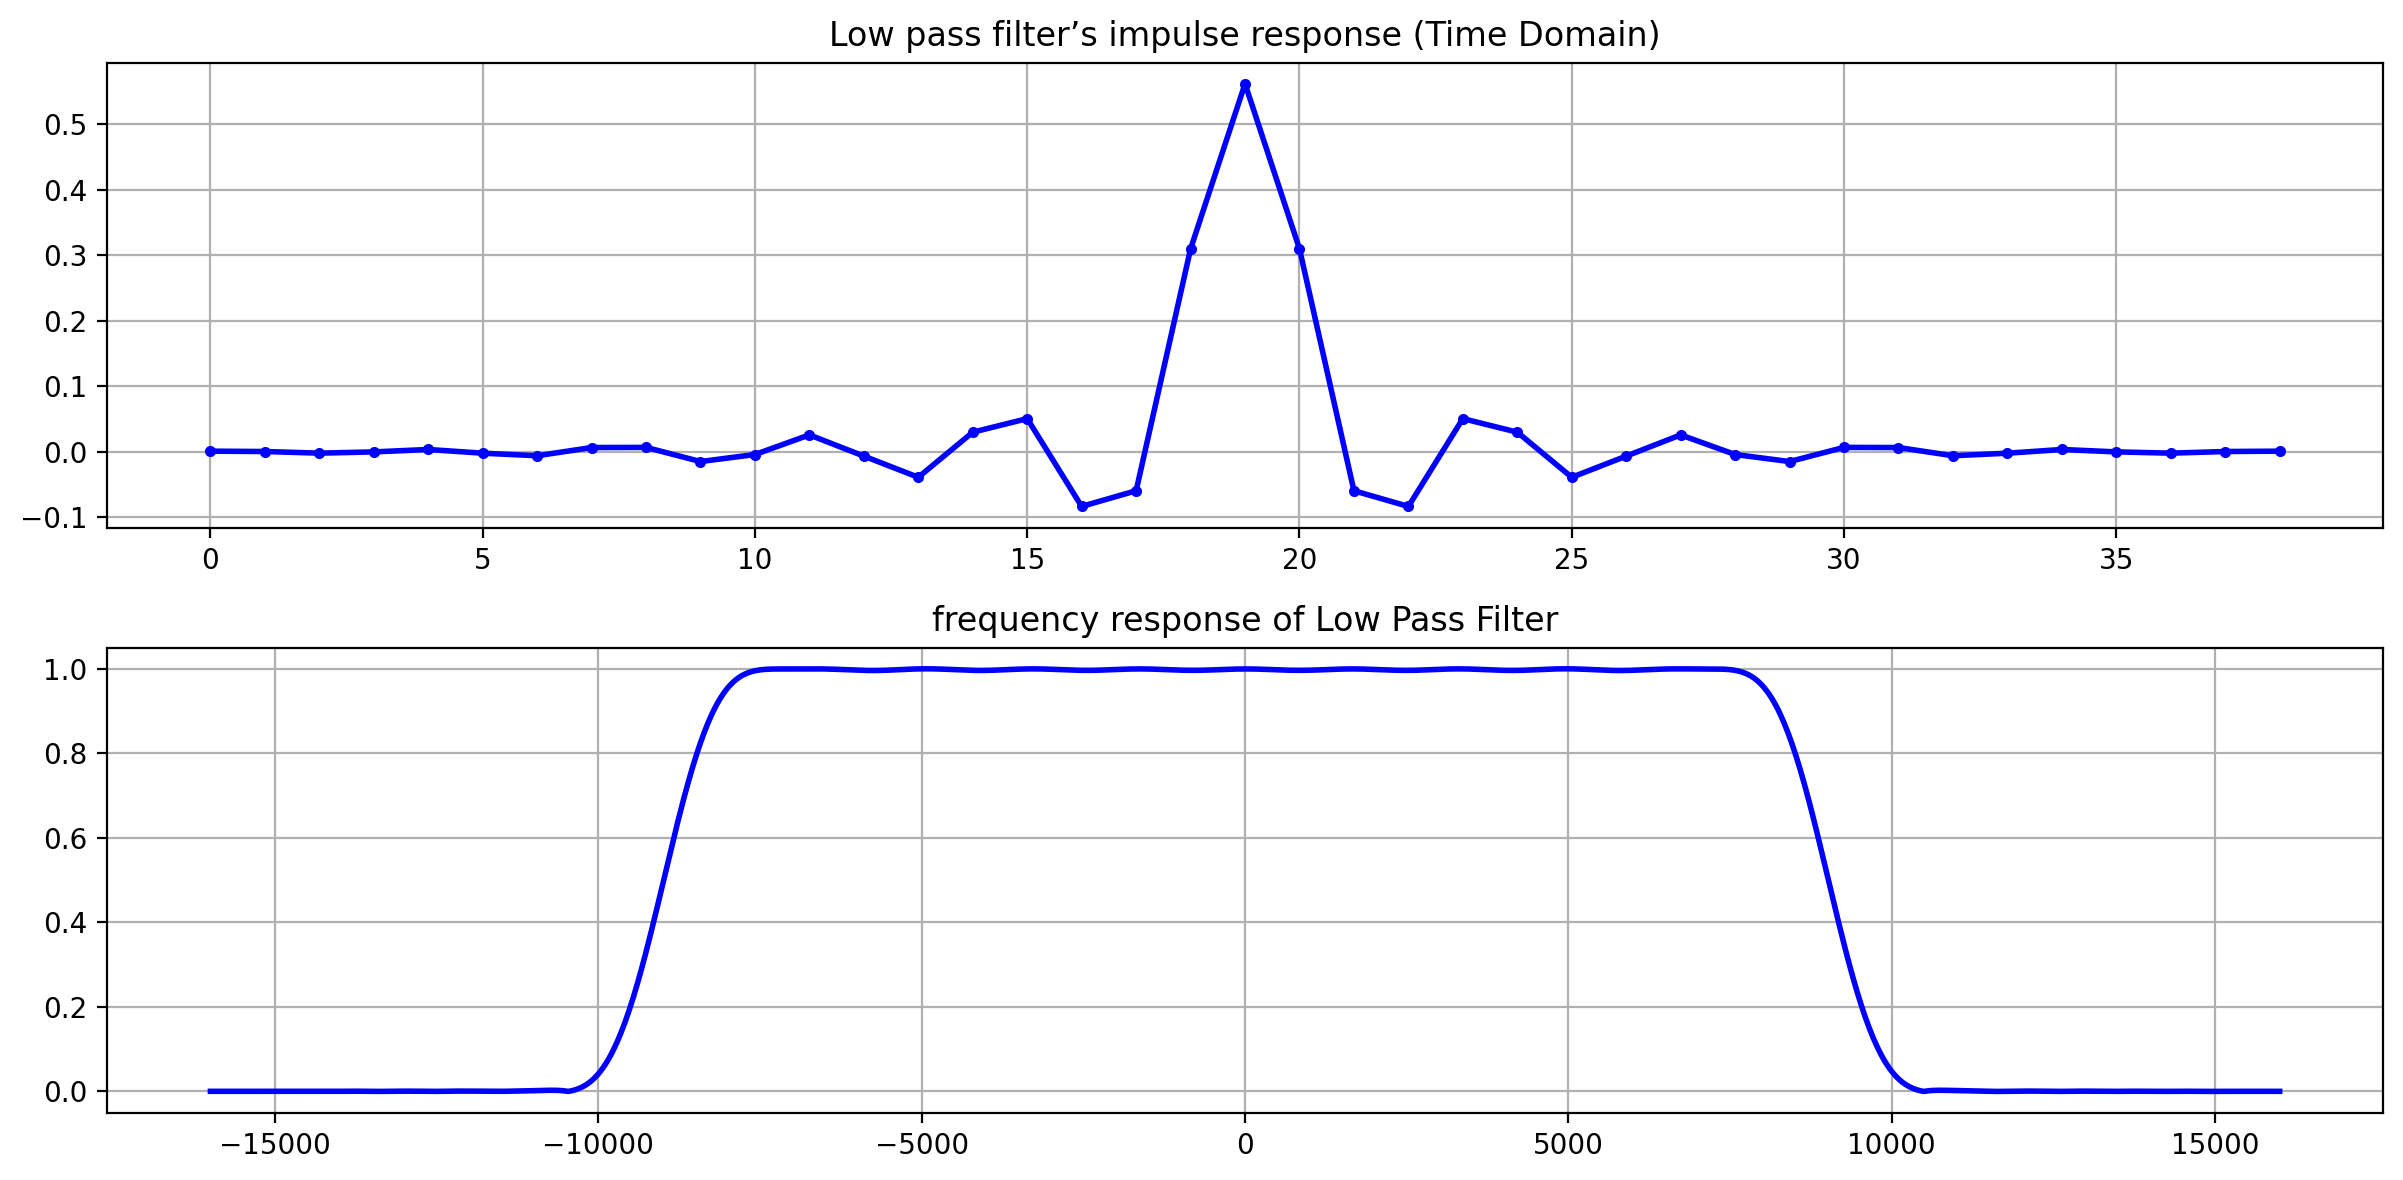

In [51]:
# Simply plotting this array of floats gives us the filter’s impulse response:

# plot the impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(h1, 'b.-', lw=2)
plt.title("Low pass filter’s impulse response (Time Domain)")
plt.grid()

# It’s a little more complicated because we have to create the x-axis array of frequencies.

# plot the frequency response
H1 = np.abs(np.fft.fft(h1, 1024)) # take the 1024-point FFT and magnitude
H1 = np.fft.fftshift(H1) # make 0 Hz in the center
w1 = np.linspace(-sample_rate/2, sample_rate/2, len(H1)) # x axis

plt.subplot(212)
plt.plot(w1, H1, 'b-', lw=2)
plt.title("frequency response of Low Pass Filter")
plt.grid()
plt.tight_layout()

In [52]:
# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h1), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h1 * exponential # do the shift

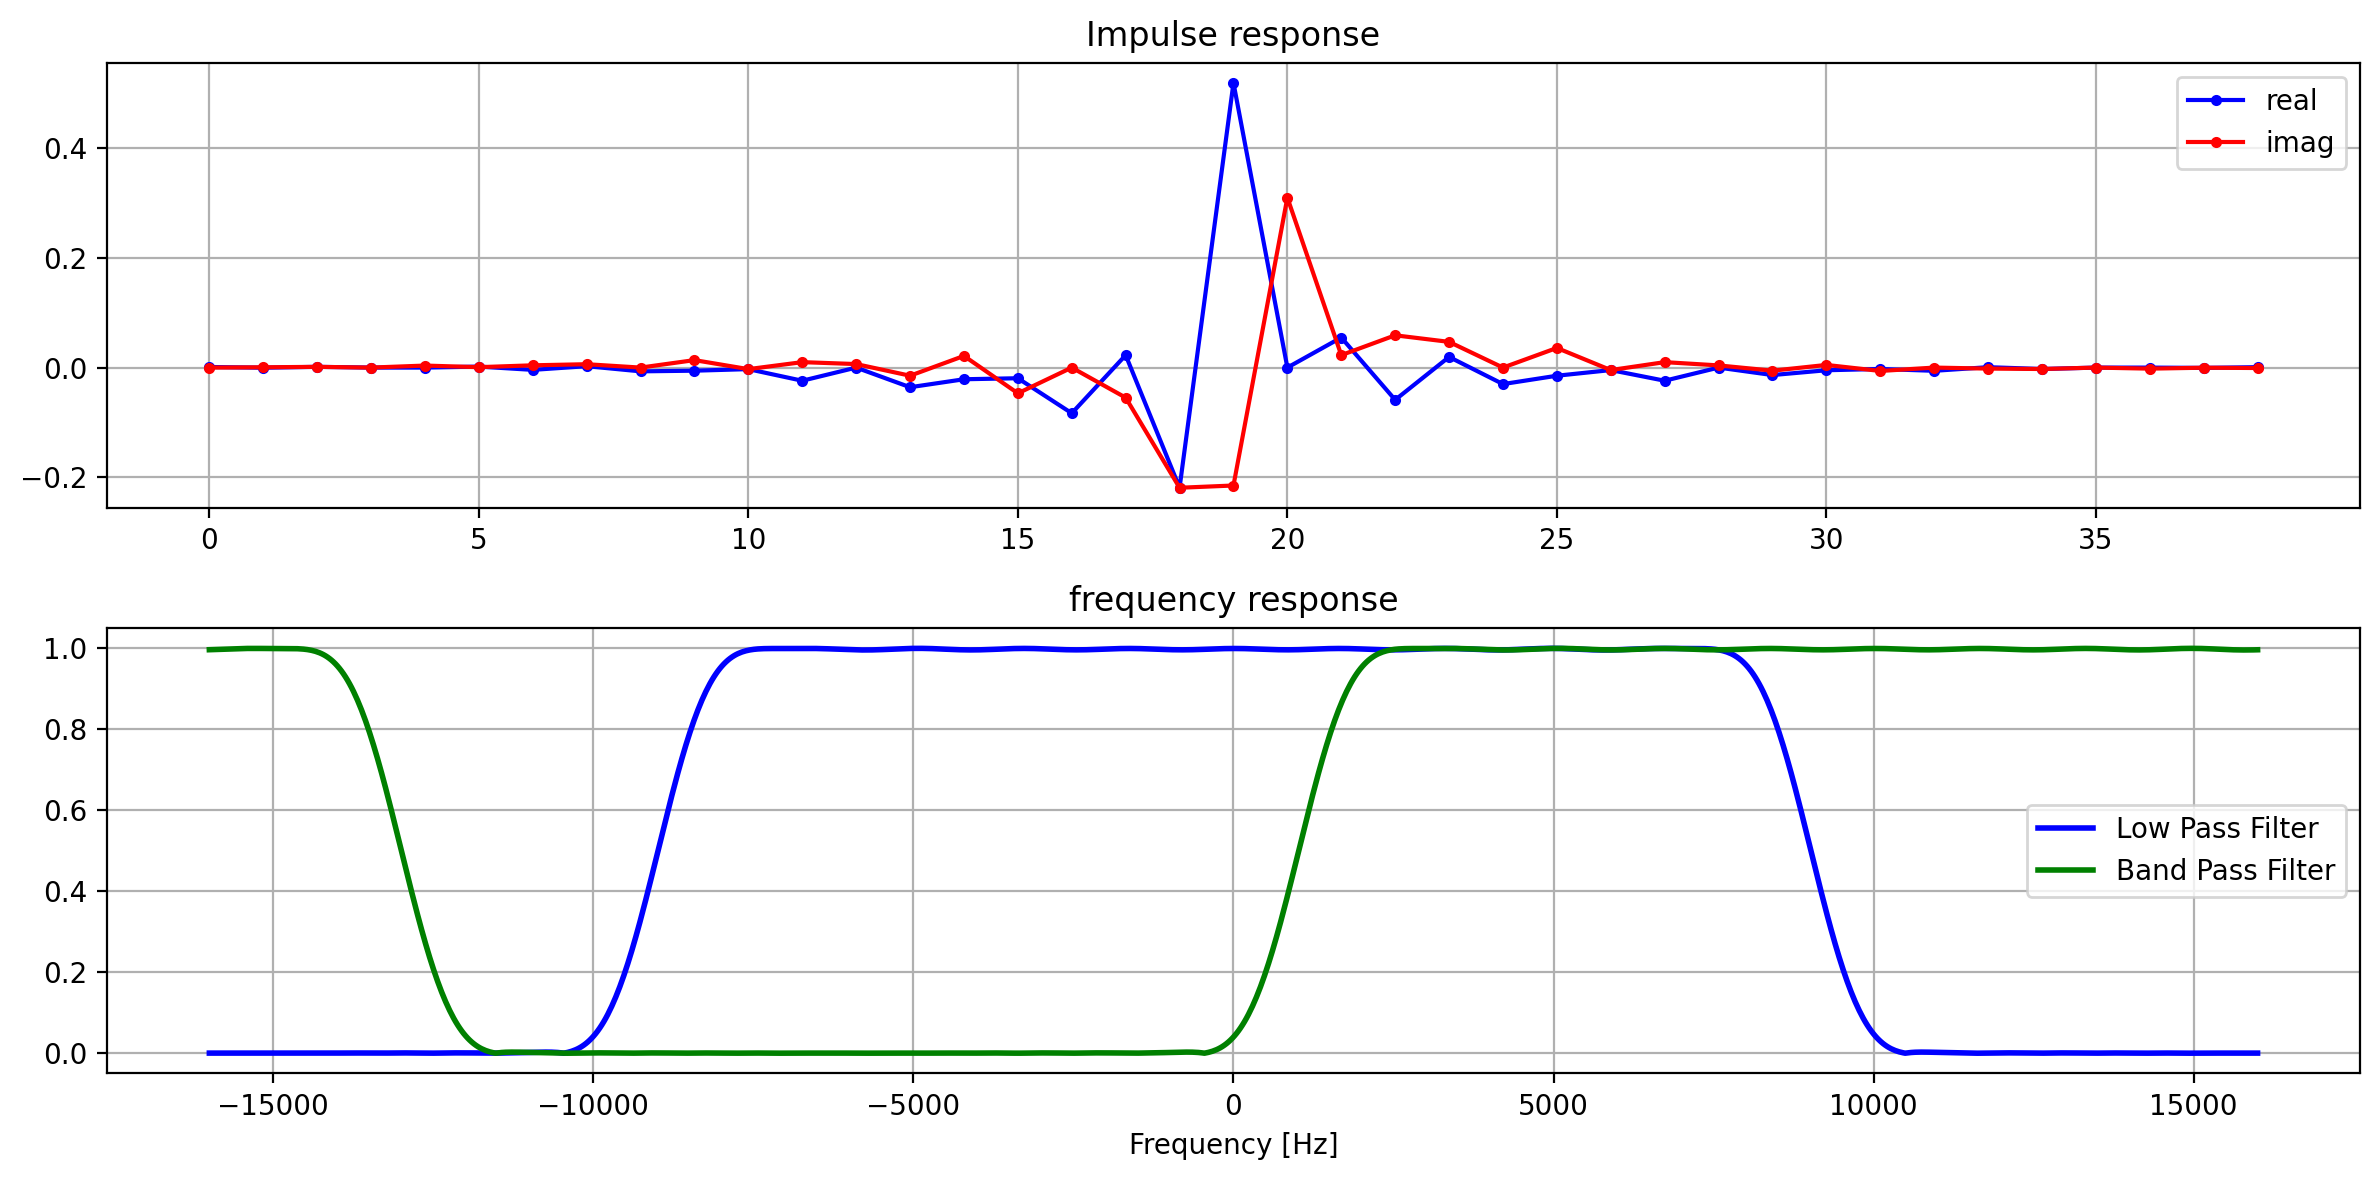

In [57]:
# plot impulse response
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(np.real(h_band_pass), 'b.-')
plt.plot(np.imag(h_band_pass), 'r.-')
plt.legend(['real', 'imag'], loc=1)
plt.title("Impulse response")
plt.grid()


# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.subplot(212)
plt.plot(w1, H1, 'b-',lw=2, label="Low Pass Filter")
plt.plot(w, H, 'g-', lw=2, label="Band Pass Filter")
plt.grid()
plt.legend(loc=0)
plt.xlabel('Frequency [Hz]')
plt.title("frequency response")
plt.tight_layout()